In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import date
import calendar

In [13]:
weather = pd.read_csv('weather.csv')
rides = pd.read_csv('cab_rides.csv')

In [14]:
rides.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [15]:
rides.dropna(axis = 0, inplace = True)

In [16]:
weather.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [17]:
weather.fillna(0, inplace = True)

In [18]:
weather_avg = weather.groupby('location').mean().reset_index()
weather_avg.drop(columns = 'time_stamp' , inplace = True)
weather_source = weather_avg.rename(columns =(lambda x :x + '_source'))       
weather_source.rename(columns= {'location_source' :'source'}, inplace = True)
weather_destination = weather_avg.rename(columns =(lambda x :x+'_destination'))       
weather_destination.rename(columns= {'location_destination' :'destination'} ,inplace = True)
data = rides\
       .merge(weather_source ,on ='source')\
       .merge(weather_destination ,on = 'destination')
data = data.drop('id'  , axis =1)

#binary encoding to cab_type

data['cab_type'] =data['cab_type'].replace({'Uber':1,'Lyft':0})

def one_hot_encode(df , column , prefix):
    dummy = pd.get_dummies(df[column] ,prefix = prefix)
    df = pd.concat([df , dummy] ,axis =1)
    df =df.drop(column , axis =1)
    
    return df

data = one_hot_encode(data ,column =  'destination' , prefix = 'desti')
data = one_hot_encode(data ,column =  'source' , prefix = 'src')
data = one_hot_encode(data ,column =  'product_id' , prefix = 'pid')
data = one_hot_encode(data ,column =  'name' , prefix = 'nm')

In [19]:
data.columns

Index(['distance', 'cab_type', 'time_stamp', 'price', 'surge_multiplier',
       'temp_source', 'clouds_source', 'pressure_source', 'rain_source',
       'humidity_source', 'wind_source', 'temp_destination',
       'clouds_destination', 'pressure_destination', 'rain_destination',
       'humidity_destination', 'wind_destination', 'desti_Back Bay',
       'desti_Beacon Hill', 'desti_Boston University', 'desti_Fenway',
       'desti_Financial District', 'desti_Haymarket Square', 'desti_North End',
       'desti_North Station', 'desti_Northeastern University',
       'desti_South Station', 'desti_Theatre District', 'desti_West End',
       'src_Back Bay', 'src_Beacon Hill', 'src_Boston University',
       'src_Fenway', 'src_Financial District', 'src_Haymarket Square',
       'src_North End', 'src_North Station', 'src_Northeastern University',
       'src_South Station', 'src_Theatre District', 'src_West End',
       'pid_55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       'pid_6c84fd89-3f11-478

In [20]:
x = data.drop('price', axis = 1)
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

sc = StandardScaler()
sc.fit(x_train)

x_train = pd.DataFrame(sc.transform(x_train) ,columns =x.columns)
x_test =  pd.DataFrame(sc.transform(x_test) ,columns = x.columns)

(446583, 64) (191393, 64) (446583,) (191393,)


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
train, test = train_test_split(data, shuffle=True, train_size=0.7)

In [ ]:
train

In [ ]:
test

In [36]:
train.to_csv('train.csv', index=False)

In [37]:
test.to_csv('test.csv', index=False)

# DONT TOUCH ABOVE THIS

In [162]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [164]:
# convert the datetime fields from epoch to datetime
train['timestamp'] = pd.to_datetime(train['time_stamp'], unit='ms')
test['timestamp'] = pd.to_datetime(test['time_stamp'], unit='ms')  

#Find hour of each trip
train['hour'] = train['timestamp'].dt.strftime('%H')
test['hour'] = test['timestamp'].dt.strftime('%H')

#Find date of each trip
train['date'] = train['timestamp'].dt.strftime('%Y-%m-%d') 
test['date'] = test['timestamp'].dt.strftime('%Y-%m-%d') 

#Find day name of each trip
train['day'] = train['timestamp'].dt.day_name()
train['day'] = train['timestamp'].dt.day_name()

# drop redundant fields 
train = train.drop('time_stamp', axis=1)
test = test.drop('time_stamp', axis=1)

In [165]:
train

,distance,cab_type,price,surge_multiplier,temp_source,clouds_source,pressure_source,rain_source,humidity_source,wind_source,...,nm_Lyft XL,nm_Shared,nm_UberPool,nm_UberX,nm_UberXL,nm_WAV,timestamp,hour,date,day
0,3.44,1,17.0,1.0,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948,...,0,0,0,0,0,1,2018-11-26 15:05:10.344,15,2018-11-26,Monday
1,2.49,0,16.5,1.0,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325,...,0,0,0,0,0,0,2018-11-30 22:18:08.459,22,2018-11-30,Friday
2,1.11,1,26.0,1.0,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117,...,0,0,0,0,0,0,2018-11-28 13:17:08.318,13,2018-11-28,Wednesday
3,2.46,1,28.5,1.0,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721,...,0,0,0,0,0,0,2018-12-15 12:10:08.678,12,2018-12-15,Saturday
4,0.54,1,10.5,1.0,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948,...,0,0,0,0,0,1,2018-12-15 20:00:07.067,20,2018-12-15,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446578,2.67,0,16.5,1.0,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528,...,1,0,0,0,0,0,2018-11-29 03:05:08.150,03,2018-11-29,Thursday
446579,2.84,0,22.5,1.0,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721,...,0,0,0,0,0,0,2018-12-15 22:15:12.411,22,2018-12-15,Saturday
446580,0.61,1,7.5,1.0,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,...,0,0,1,0,0,0,2018-12-14 07:45:09.534,07,2018-12-14,Friday
446581,3.07,1,10.5,1.0,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721,...,0,0,0,1,0,0,2018-11-29 00:03:41.410,00,2018-11-29,Thursday


In [166]:
train['hour']=train['hour'].astype('int')

(14000.0, 22000.0)

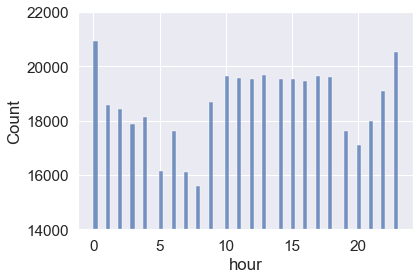

In [168]:
a=sns.histplot(x='hour', data=train)
a.set_ylim(14000,22000)

In [171]:
def dummy(x):
    if x['hour'] == 0 or x['hour']==23:
        return 1
    if x['hour']>=10 and x['hour']<=18:
        return 1
    else:
        return 0

In [172]:
train['rush_dummy'] = train.apply(lambda x: dummy(x), axis=1)

In [174]:
train.loc[train['rush_dummy'] == 0]

,distance,cab_type,price,surge_multiplier,temp_source,clouds_source,pressure_source,rain_source,humidity_source,wind_source,...,nm_Shared,nm_UberPool,nm_UberX,nm_UberXL,nm_WAV,timestamp,hour,date,day,rush_dummy
1,2.49,0,16.5,1.0,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325,...,0,0,0,0,0,2018-11-30 22:18:08.459,22,2018-11-30,Friday,0
4,0.54,1,10.5,1.0,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948,...,0,0,0,0,1,2018-12-15 20:00:07.067,20,2018-12-15,Saturday,0
5,3.39,1,11.0,1.0,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180,...,0,1,0,0,0,2018-12-13 20:35:10.309,20,2018-12-13,Thursday,0
6,3.08,1,11.0,1.0,38.983403,0.677247,1008.441090,0.008657,0.767266,6.816233,...,0,0,1,0,0,2018-12-16 06:30:05.674,6,2018-12-16,Sunday,0
7,0.73,1,15.0,1.0,38.983403,0.677247,1008.441090,0.008657,0.767266,6.816233,...,0,0,0,0,0,2018-12-01 22:38:02.251,22,2018-12-01,Saturday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446577,3.07,1,8.5,1.0,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721,...,0,1,0,0,0,2018-12-17 20:45:09.310,20,2018-12-17,Monday,0
446578,2.67,0,16.5,1.0,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528,...,0,0,0,0,0,2018-11-29 03:05:08.150,3,2018-11-29,Thursday,0
446579,2.84,0,22.5,1.0,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721,...,0,0,0,0,0,2018-12-15 22:15:12.411,22,2018-12-15,Saturday,0
446580,0.61,1,7.5,1.0,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,...,0,1,0,0,0,2018-12-14 07:45:09.534,7,2018-12-14,Friday,0


<AxesSubplot:xlabel='rush_dummy', ylabel='price'>

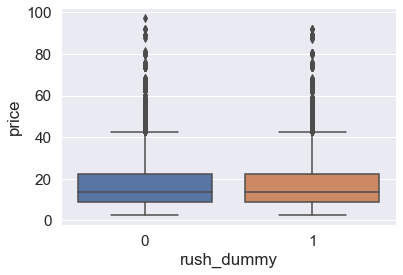

In [177]:
sns.boxplot(y='price', x='rush_dummy', data=train)

<AxesSubplot:xlabel='day', ylabel='price'>

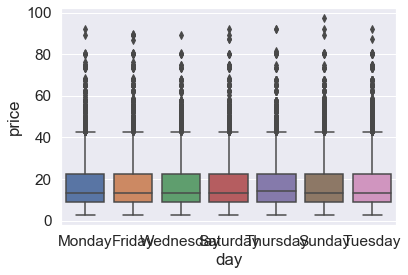

In [204]:
sns.boxplot(x='day',y='price', data=train )

(14000.0, 110000.0)

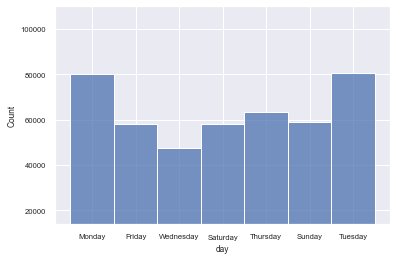

In [212]:
sns.set(font_scale=0.7)
#order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
a=sns.histplot(x='day', data=train)
a.set_ylim(14000,110000)